In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('hr_dataset.csv')

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Name                 200000 non-null  object
 1   Age                  200000 non-null  int64 
 2   Years_of_Experience  200000 non-null  int64 
 3   Current_Salary       200000 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


In [4]:
df.head()

,Name,Age,Years_of_Experience,Current_Salary
0,BRADDY,43,19,"$1,20,648.00"
1,BORST,44,17,"$1,37,573.00"
2,BIRDWELL,45,29,"$1,27,999.00"
3,BENT,54,29,"$84,403.00"
4,BAZAN,41,22,"$1,11,361.00"


In [5]:
df.shape

(200000, 4)

In [6]:
df.isnull().any()

Name                   False
Age                    False
Years_of_Experience    False
Current_Salary         False
dtype: bool

### There is no null values in the dataset

## Visualizations

<AxesSubplot:>

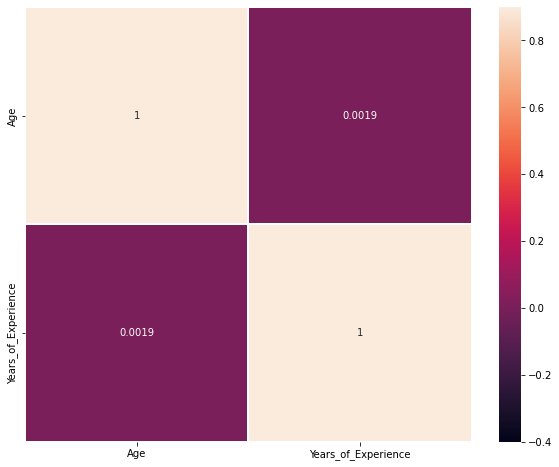

In [7]:
corrmatrix = df.corr()
plt.subplots(figsize =(10,8))
sns.heatmap(corrmatrix, vmin =-.4,vmax=0.9,annot =True ,linewidth =.2)

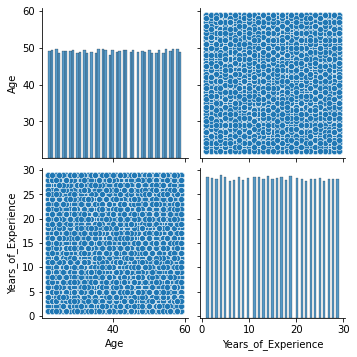

In [8]:
sns.pairplot(df)

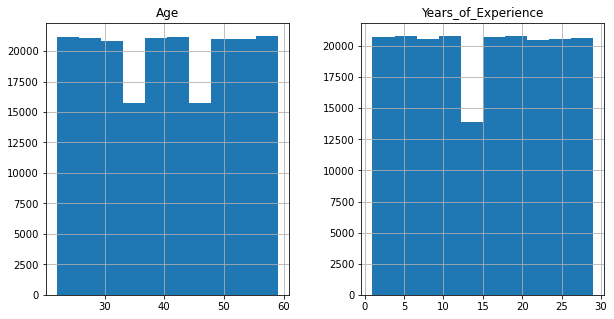

In [9]:
df.hist(figsize=(10,5))
plt.show()

## Train The Model

### Logistic Regression

In [6]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Convert 'Current_Salary' to numerical format
# Remove the dollar sign and commas, then convert to float
df['Current_Salary'] = df['Current_Salary'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

#'Current_Salary' is the target variable, we need to convert it to a binary format for logistic regression
median_salary = df['Current_Salary'].median()
df['High_Salary'] = np.where(df['Current_Salary'] >= median_salary, 1, 0)

# Selecting predictors
X = df[['Age', 'Years_of_Experience']]
y = df['High_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

print('Logistic Regression Model Accuracy:', accuracy)
print('Classification Report:\n', class_report)
# Save the trained model to a file using pickle
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(log_reg, model_file)

print(f'Model saved to {model_filename}')

Missing values in each column:
 Name                   0
Age                    0
Years_of_Experience    0
Current_Salary         0
dtype: int64
Logistic Regression Model Accuracy: 0.4986
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     19945
           1       0.50      0.48      0.49     20055

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000

Model saved to logistic_regression_model.pkl


### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting predictors for linear regression
X = df[['Age', 'Years_of_Experience']]
y = df['Current_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients and intercept
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

print('Linear Regression Model Coefficients:', coefficients)
print('Linear Regression Model Intercept:', intercept)
print('Mean Squared Error (MSE):', mse)
print('R-squared Value:', r2)
# Save the trained linear regression model to a file using pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(lin_reg, model_file)

print(f'Linear Regression Model saved to {model_filename}')

Linear Regression Model Coefficients: [  8.14949521 -12.80378004]
Linear Regression Model Intercept: 99929.5881207496
Mean Squared Error (MSE): 832066704.0325164
R-squared Value: -3.977020769951878e-05
Linear Regression Model saved to linear_regression_model.pkl


### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [8]:
acc_values

[0.50315,
 0.5037,
 0.5026,
 0.5043,
 0.50215,
 0.5037,
 0.501725,
 0.501125,
 0.5022,
 0.5026,
 0.502725,
 0.503225,
 0.5022,
 0.502725,
 0.502425,
 0.5029,
 0.502475,
 0.502475,
 0.5011,
 0.502225]

Text(0, 0.5, 'accuracy')

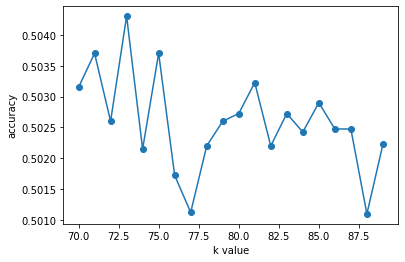

In [9]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [11]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.5037
precision: 0.5050752537626881
recall: 0.5036649214659686
f1_score: 0.5043691017126879


### Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [14]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.49995
precision: 0.5014309627949673
recall: 0.4630266766392421
f1_score: 0.48146419868305074


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(X_train,y_train)
y_predict = Classifier.predict(X_test)

In [17]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.49995
precision: 0.5014309627949673
recall: 0.4630266766392421
f1_score: 0.48146419868305074


### GradientBoostingClassifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [19]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.4987
precision: 0.5000726920281076
recall: 0.5145350286711543
f1_score: 0.5072007864340132


## HYPER PARAMETER TUNING

### KNN

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 10],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create the KNN model
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.4987
precision: 0.5000726920281076
recall: 0.5145350286711543
f1_score: 0.5072007864340132


### LINEAR REGRESSION

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with a scaler and a Ridge regression model
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', Ridge())])

# Define the parameter grid
param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'model__alpha': 100}


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.4987
precision: 0.5000726920281076
recall: 0.5145350286711543
f1_score: 0.5072007864340132
